In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.1/822.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3

In [ ]:
def image_to_text(path):
  input_img = Image.open(path)

  #CONVERTING IMAGE TO ARRAY FORMAT
  image_arr = np.array(input_img)

  reader = easyocr. Reader(['en'])
  text = reader.readtext(image_arr, detail = 0)
  return text, input_img

In [ ]:
text_image, input_img = image_to_text("/content/2.png")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
text_image

['KARTHICK',
 'General Manager',
 '123 ABC St , Salem,',
 'TamilNadu 6004513',
 '+123-456-7890',
 'hello@Borcelle.com',
 'wwW.Borcelle.com',
 'BORCELLE',
 'AIRLINES']

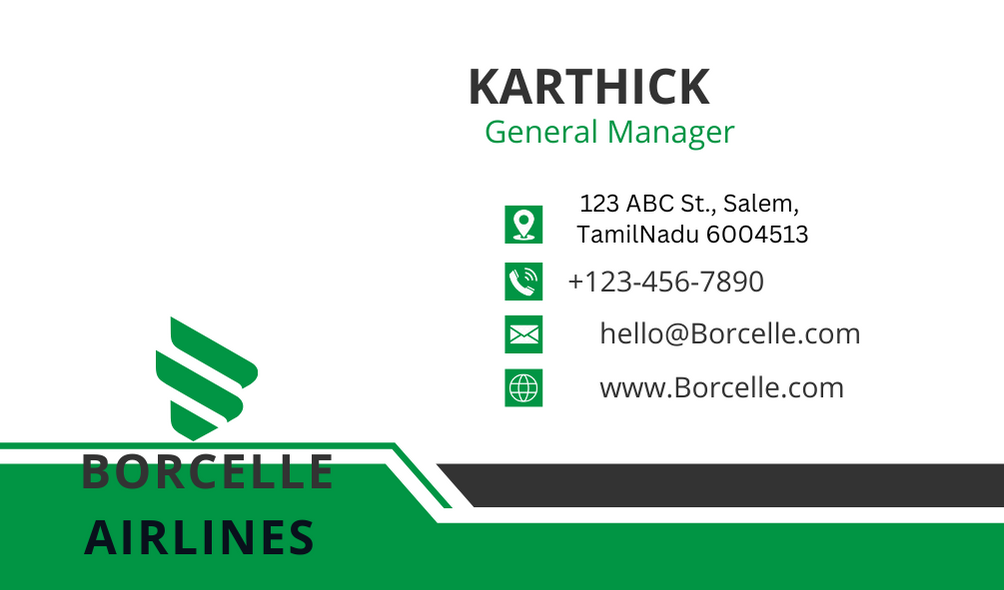

In [ ]:
input_img

In [ ]:
def extracted_text(texts):
  extrd_dict = {"NAME":[],"DESIGNATION":[], "COMPANY_NAME":[],"CONTACT":[], "EMAIL":[], "WEBSITE":[],"ADDRESS":[],"PINCODE":[]}
  extrd_dict["NAME"].append(texts[0])
  extrd_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):
    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and "-" in texts[i]):
      extrd_dict["CONTACT"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extrd_dict["EMAIL"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small = texts[i].lower()
      extrd_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():
      extrd_dict["PINCODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]',texts[i]):
      extrd_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colon=re.sub(r'[,;]','',texts[i])
      extrd_dict["ADDRESS"].append(remove_colon)

  for key,value in extrd_dict.items():
    if len(value)>0:
      concadenate =" ".join(value)
      extrd_dict[key]=[concadenate]

    else:
      value = "NA"
      extrd_dict[key] = [value]


  return extrd_dict

In [ ]:
extracted_text(text_image)

{'NAME': ['KARTHICK'],
 'DESIGNATION': ['General Manager'],
 'COMPANY_NAME': ['BORCELLE AIRLINES'],
 'CONTACT': ['+123-456-7890'],
 'EMAIL': ['hello@Borcelle.com'],
 'WEBSITE': ['www.borcelle.com'],
 'ADDRESS': ['123 ABC St  Salem'],
 'PINCODE': ['TamilNadu 6004513']}

In [ ]:
text_data = extracted_text(text_image)

In [ ]:
df=pd.DataFrame(text_data)
df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE
0,KARTHICK,General Manager,BORCELLE AIRLINES,+123-456-7890,hello@Borcelle.com,www.borcelle.com,123 ABC St Salem,TamilNadu 6004513


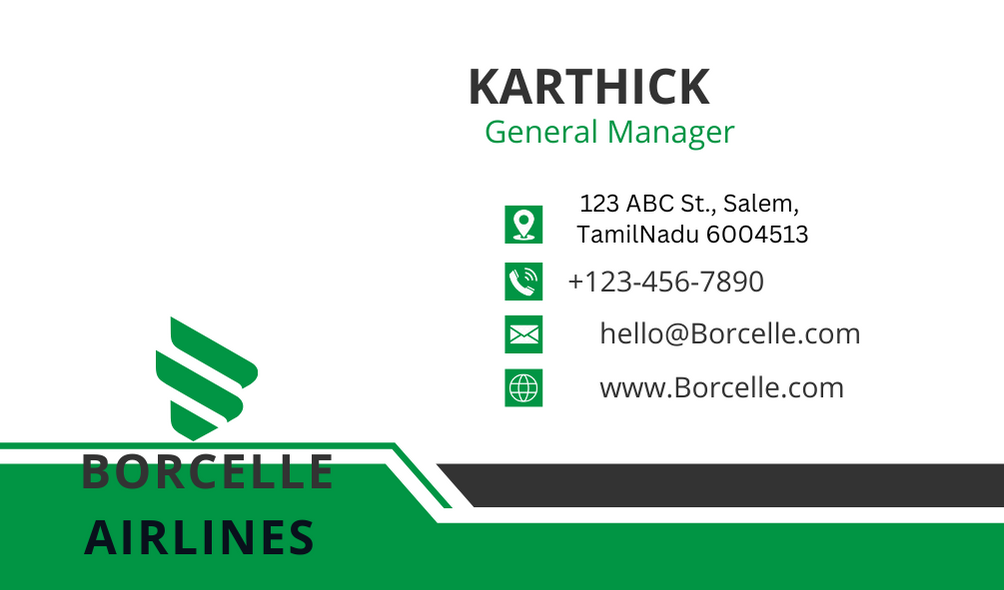

In [ ]:
input_img

In [ ]:
#converting image to bytes

Image_bytes = io.BytesIO()
input_img.save(Image_bytes, format = "PNG")

image_data= Image_bytes.getvalue()

#create dictionary
data = {"IMAGE": [image_data]}

df_1=pd.DataFrame(data)

concat_df=pd.concat([df,df_1],axis=1)
concat_df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE,IMAGE
0,KARTHICK,General Manager,BORCELLE AIRLINES,+123-456-7890,hello@Borcelle.com,www.borcelle.com,123 ABC St Salem,TamilNadu 6004513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [ ]:
mydb = sqlite3.connect("bizcardx.db")
cursor = mydb.cursor()

#Table creation

create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(225),
                                                                    designation  varchar(225),
                                                                    company_name varchar(225),
                                                                    contact varchar(225),
                                                                    email varchar(225),
                                                                    website text,
                                                                    address text,
                                                                    pincode varchar(225),
                                                                    image text)'''
cursor.execute(create_table_query)
mydb.commit


<function Connection.commit()>

In [ ]:
#Insert query

insert_query = '''INSERT INTO bizcard_details(name,designation,company_name,contact, email,website,address,pincode,image)
                                              values(?,?,?,?,?,?,?,?,?)'''

datas = concat_df.values.tolist()[0]
cursor.execute(insert_query,datas)
mydb.commit()


In [ ]:
#select query

select_query = "select NAME from bizcard_details "

cursor.execute(select_query)
table1=cursor.fetchall()
mydb.commit()

names = []

for i in table1:
  names.append(i[0])

names

['KARTHICK']

In [ ]:
datas = concat_df.values.tolist()
datas

[['KARTHICK',
  'General Manager',
  'BORCELLE AIRLINES',
  '+123-456-7890',
  'hello@Borcelle.com',
  'www.borcelle.com',
  '123 ABC St  Salem',
  'TamilNadu 6004513',
  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\xddg|\x1c\xd5\xd9\xf7\xf1\xdf\x94-Z\xf5b\xc9\x92\xdcm\xb9wc\x1b\xb0M5q\xc0\xf4\x92@\x02\xa1Ch\xa97\x10B\x1aIH\x05\x92\x10H \xc1\x81\x07\x08%\x10\xaa\xe9\x18\x1c\xc0\x18\xdc\x8b\xe4\xde\x9bd\xab\xb7\x95\xb6\xcc\xcc\xf3bu\xc6\xb3*.`\xb0\x0c\xd7\xf7\xfe(\xb6\xb5\xbb3g\x8an\xf4\x9fs\xceu4\xc7q\x1c\x84\x10B\x08!\x84\x10B\x08\xd1\xad\xe8\x87\xbb\x01B\x08!\x84\x10B\x08!\x84\xe8H\x02\xbb\x10B\x08!\x84\x10B\x08\xd1\rI`\x17B\x08!\x84\x10B\x08!\xba!\t\xecB\x08!\x84\x10B\x08!D7$\x81]\x08!\x84\x10B\x08!\x84\xe8\x86$\xb0\x0b!\x84\x10B\x08!\x84\x10\xdd\x90\x04v!\x84\x10B\x08!\x84\x10\xa2\x1b\x92\xc0.\x84\x10B\x08!\x84\x10BtC\x12\xd8\x85\x10B\x08!\x84\x10B\x88nH\x02\xbb\x10B\x08!\x84\x10B\x08\xd1\rI`\x17B\x08!

In [ ]:
%%writefile myapp.py

import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3


def image_to_text(path):
  input_img = Image.open(path)

  #CONVERTING IMAGE TO ARRAY FORMAT
  image_arr = np.array(input_img)

  reader = easyocr. Reader(['en'])
  text = reader.readtext(image_arr, detail = 0)
  return text, input_img

def extracted_text(texts):
  extrd_dict = {"NAME":[],"DESIGNATION":[], "COMPANY_NAME":[],"CONTACT":[], "EMAIL":[], "WEBSITE":[],"ADDRESS":[],"PINCODE":[]}
  extrd_dict["NAME"].append(texts[0])
  extrd_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):
    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and "-" in texts[i]):
      extrd_dict["CONTACT"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extrd_dict["EMAIL"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small = texts[i].lower()
      extrd_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():
      extrd_dict["PINCODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]',texts[i]):
      extrd_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colon=re.sub(r'[,;]','',texts[i])
      extrd_dict["ADDRESS"].append(remove_colon)

  for key,value in extrd_dict.items():
    if len(value)>0:
      concadenate =" ".join(value)
      extrd_dict[key]=[concadenate]

    else:
      value = "NA"
      extrd_dict[key] = [value]


  return extrd_dict

#streamlit part

st.set_page_config(layout = "wide")
st.title ("Extracting Business card data with OCR")

with st.sidebar:
  select = option_menu("Main Menu", ["Home", "Upload & Modify", "Delete"])

if select == "Home":
  pass

elif select == "Upload & Modify":
  img = st.file_uploader("Upload the Image", type=["png","jpg","jpeg"])

  if img is not None:
    st.image(img, width = 300)

    text_image,input_img = image_to_text(img)
    text_dict=extracted_text(text_image)
    if text_dict:
      st.success("text is extracted successfully")

    df = pd.DataFrame(text_dict)
    #converting image to bytes

    Image_bytes = io.BytesIO()
    input_img.save(Image_bytes, format = "PNG")

    image_data= Image_bytes.getvalue()

    #create dictionary
    data = {"IMAGE": [image_data]}

    df_1=pd.DataFrame(data)

    concat_df=pd.concat([df,df_1],axis=1)
    st.dataframe(concat_df)

    button_1 = st.button("Save",use_container_width = True)
    if button_1:
      mydb = sqlite3.connect("bizcardx.db")
      cursor = mydb.cursor()

      #Table creation

      create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(225),
                                                                          designation  varchar(225),
                                                                          company_name varchar(225),
                                                                          contact varchar(225),
                                                                          email varchar(225),
                                                                          website text,
                                                                          address text,
                                                                          pincode varchar(225),
                                                                          image text)'''
      cursor.execute(create_table_query)
      mydb.commit

      #Insert query

      insert_query = '''INSERT INTO bizcard_details(name,designation,company_name,contact, email,website,address,pincode,image)
                                                    values(?,?,?,?,?,?,?,?,?)'''

      datas = concat_df.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()

      st.success("Saved successfully")

  method = st.radio("select the method", ["None","Preview","Modify"])

  if method == "None":
    st.write("")

  if method == "Preview":

    mydb = sqlite3.connect("bizcardx.db")
    cursor=mydb.cursor()
    #select query

    select_query = "select * from bizcard_details "

    cursor.execute(select_query)
    table=cursor.fetchall()
    mydb.commit()

    table_df = pd.DataFrame(table, columns = ("NAME", "DESIGNATION","COMPANY_NAME","CONTACT","EMAIL", "WEBSITE","ADDRESS","PINCODE","IMAGE"))
    st.dataframe(table_df)

  elif method == "Modify":
    mydb = sqlite3.connect("bizcardx.db")
    cursor=mydb.cursor()
    #select query

    select_query = "select * from bizcard_details "

    cursor.execute(select_query)
    table=cursor.fetchall()
    mydb.commit()

    table_df = pd.DataFrame(table, columns = ("NAME", "DESIGNATION","COMPANY_NAME","CONTACT","EMAIL", "WEBSITE","ADDRESS","PINCODE","IMAGE"))
    st.dataframe(table_df)

    col1,col2=st.columns(2)
    with col1:
      selected_name = st.selectbox("Select the name", table_df["NAME"])

    df_3 = table_df[table_df["NAME"]==selected_name]

    st.dataframe(df_3)

    df_4=df_3.copy()

    st.dataframe(df_4)

    col1,col2=st.columns(2)
    with col1:
    #"EMAIL", "WEBSITE","ADDRESS","PINCODE","IMAGE"))

      mo_name =st.text_input("Name", df_3["NAME"].unique()[0])
      mo_desig =st.text_input("Designation",df_3["DESIGNATION"].unique()[0])
      mo_comp_name =st.text_input("Company_name", df_3["COMPANY_NAME"].unique()[0])
      mo_contact =st.text_input("Contact", df_3["CONTACT"].unique()[0])
      mo_email =st.text_input("Email",df_3["EMAIL"].unique()[0])

      df_4["NAME"]=mo_name
      df_4["DESIGNATION"]=mo_desig
      df_4["COMPANY_NAME"]=mo_comp_name
      df_4["CONTACT"]=mo_contact
      df_4["EMAIL"]=mo_email


    with col2:
      mo_website =st.text_input("Website", df_3["WEBSITE"].unique()[0])
      mo_Address =st.text_input("Address", df_3["ADDRESS"].unique()[0])
      mo_Pincode =st.text_input("Pincode", df_3["PINCODE"].unique()[0])
      mo_Image =st.text_input("Image", df_3["IMAGE"].unique()[0])

      df_4["WEBSITE"]=mo_website
      df_4["ADDRESS"]=mo_Address
      df_4["PINCODE"]=mo_Pincode
      df_4["IMAGE"]=mo_Image

    st.dataframe(df_4)

    col1,col2=st.columns(2)
    with col1:
      button_3= st.button("Modify",use_container_width = True)

    if button_3:
      mydb = sqlite3.connect("bizcardx.db")
      cursor=mydb.cursor()

      cursor.execute(f"Delete from bizcard_details where NAME= '{selected_name}'")
      mydb.commit()

      #Insert query

      insert_query = '''INSERT INTO bizcard_details(name,designation,company_name,contact, email,website,address,pincode,image)
                                                    values(?,?,?,?,?,?,?,?,?)'''

      datas = df_4.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()

      st.success("MODIFIED SUCCESSFULLY")







elif select == "Delete":

  mydb = sqlite3.connect("bizcardx.db")
  cursor = mydb.cursor()

  col1,col2 = st.columns(2)
  with col1:

    select_query = "SELECT NAME FROM bizcard_details"

    cursor.execute(select_query)
    table1 = cursor.fetchall()
    mydb.commit()

    names = []

    for i in table1:
      names.append(i[0])

    name_select = st.selectbox("Select the name", names)

  with col2:

    select_query = f"SELECT DESIGNATION FROM bizcard_details WHERE NAME ='{name_select}'"

    cursor.execute(select_query)
    table2 = cursor.fetchall()
    mydb.commit()

    designations = []

    for j in table2:
      designations.append(j[0])

    designation_select = st.selectbox("Select the designation", options = designations)

  if name_select and designation_select:
    col1,col2,col3 = st.columns(3)

    with col1:
      st.write(f"Selected Name : {name_select}")
      st.write("")
      st.write("")
      st.write("")
      st.write(f"Selected Designation : {designation_select}")

    with col2:
      st.write("")
      st.write("")
      st.write("")
      st.write("")

      remove = st.button("Delete", use_container_width= True)

      if remove:

        cursor.execute(f"DELETE FROM bizcard_details WHERE NAME ='{name_select}' AND DESIGNATION = '{designation_select}'")
        mydb.commit()

        st.warning("DELETED")

Writing myapp.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run myapp.py & npx localtunnel --port 8501